# 1. Import Libraries 

In [161]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 2 Load data set

In [162]:
bankdata = pd.read_csv("bank-full.csv")


# 3.a Shape


In [163]:
bankdata.shape


(45211, 17)

There are 45211 records of data with 17 features in each record

# 3.b Data type of each attribute

In [164]:
bankdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [165]:
bankdata.dtypes.value_counts()


object    10
int64      7
dtype: int64

Out of 17 features 10 features as string( we have to fit them to categorical) and 7 are numeric.

# 3.c Checking the presence of missing values

In [166]:
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no null values

In [167]:
bankdata.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no na values


# 3.d 5 Point summary of numerical value

In [168]:
bankdata.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Age Q3+1.5IQR = 48.000000+(1.5*(48.000000-33)) = 70.5 . But Max value is 95. It shows that there are some outliers.The outlier information shall also be obtained from box plots.

Similarly there will be possibility of outliers in previous, pdays, duration, balance. As the difference between Q3(75%) and max is more.
This shall be optained from box plot too.
balance min is -Ve value . IS it a type mistake.
pdays Min Q1, Q2,Q3 are -1 . What does it indicate



# EDA Basics

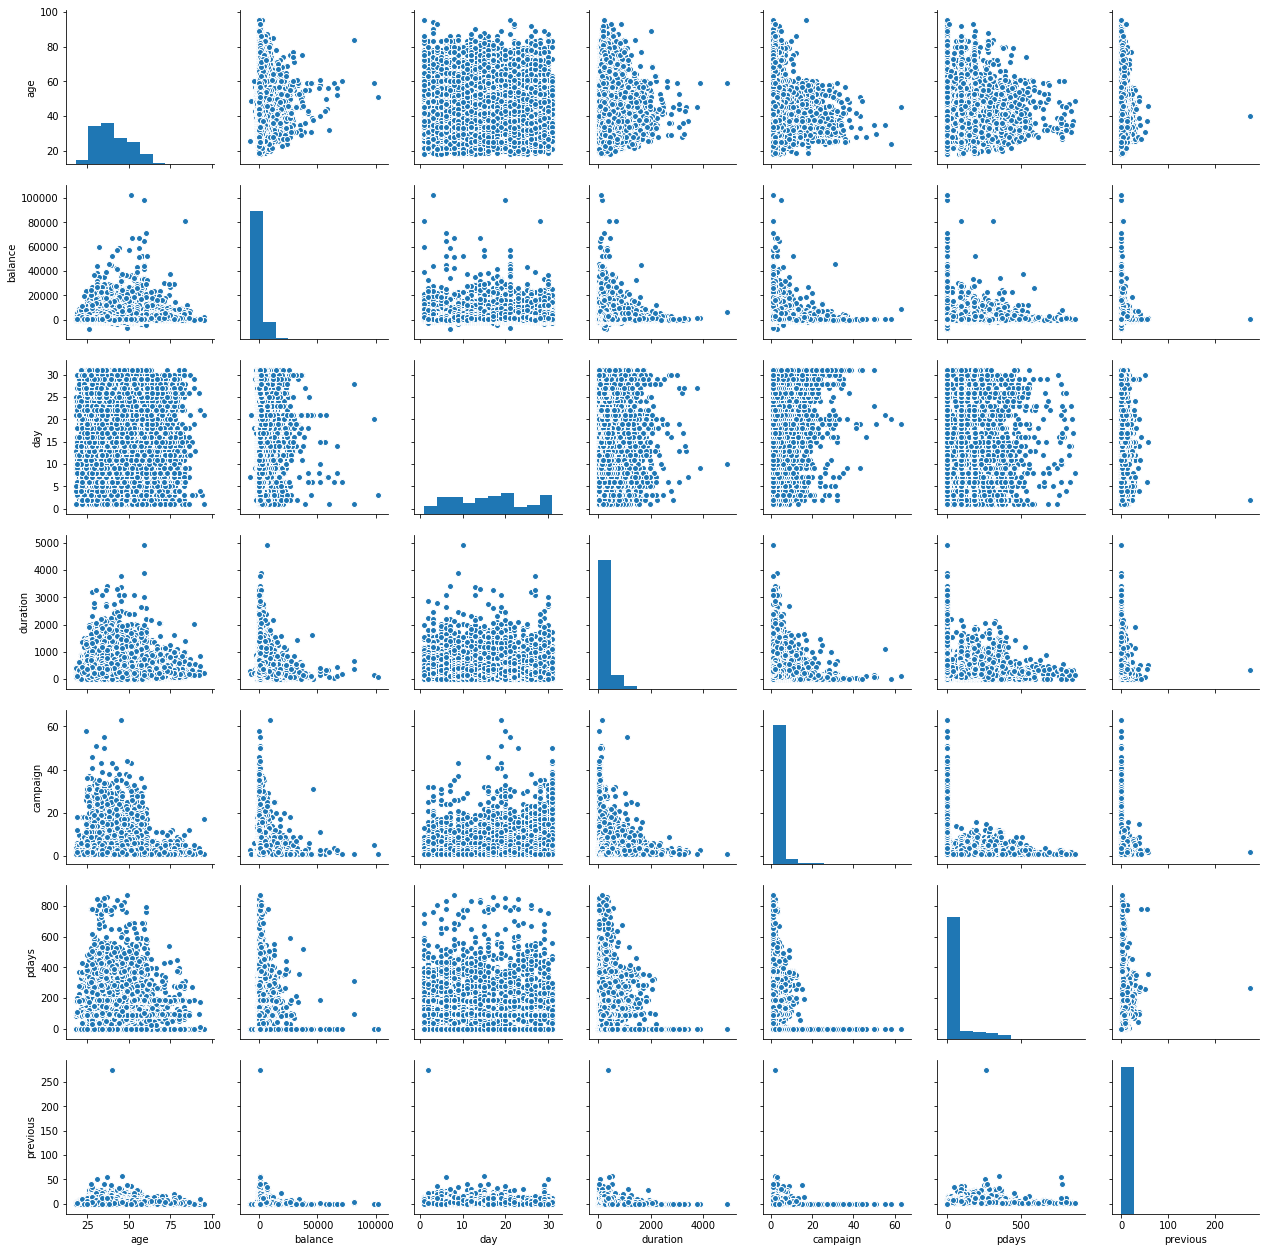

In [169]:
sns.pairplot(data=bankdata)

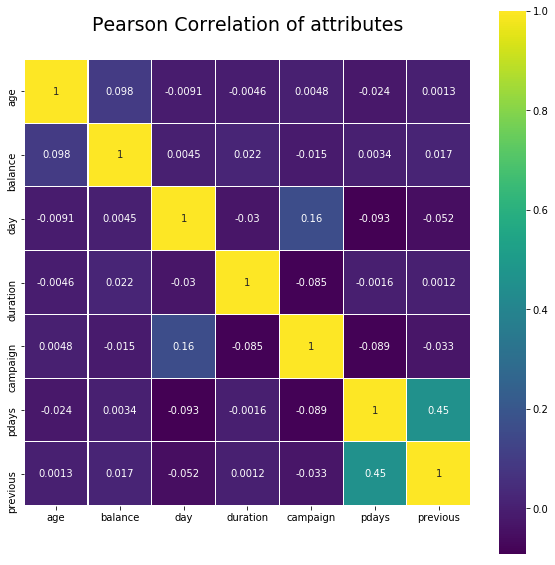

In [170]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(bankdata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Exploring age

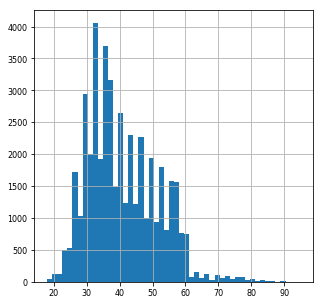

In [171]:
bankdata['age'].hist(figsize=(5,5),bins = 50, xlabelsize =8, ylabelsize=8)

# 3.e Outliers in age

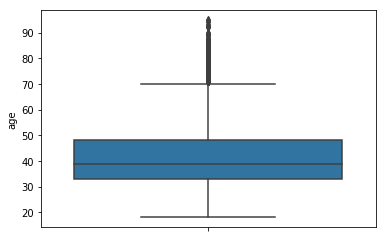

In [172]:
import seaborn as sns
sns.boxplot(data=bankdata, y='age')

Age values aboe 70 are considered to be outliers

# 3.e Outliers in balance 

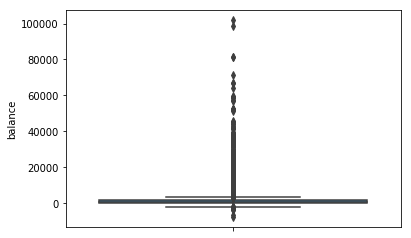

In [173]:
sns.boxplot(data=bankdata, y='balance')

There are some outliers in balance

# 3.e Outliers in duration

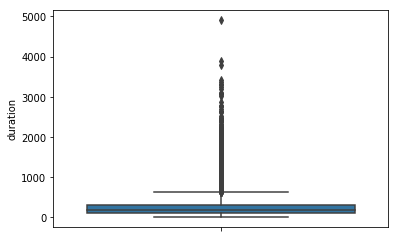

In [174]:
sns.boxplot(data=bankdata, y = 'duration')

There are some outliers in "duration"

# 3.e Outliers in pdays

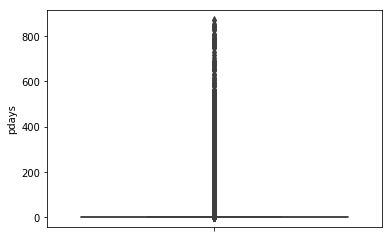

In [175]:
sns.boxplot(data=bankdata, y='pdays')


pdays are Q1,Q2,Q3 are same and is "-1".As all are same the values other than this are outliers.

# 3.e Outliers in previous

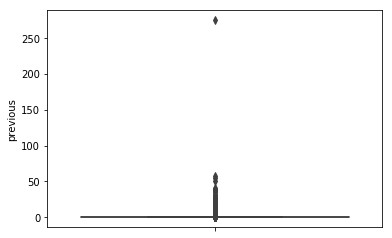

In [176]:
sns.boxplot(data=bankdata, y = 'previous')

# 4. Data preparation


# 4.2 Negative values in balance 

In [177]:
bankdata['balance'].loc[bankdata['balance']<0].count()

3766

There are 3766 bank accounts where the balance is -Ve

In [178]:
bankdata['pdays'].loc[bankdata['pdays']==999].count()

0

As mentioned in the  problem statement there are no records with pdays == '999' (Assuming all the customers are contacted).

In [179]:
bankdata['pdays'].loc[bankdata['pdays']==-1].count()

36954

But there are 36,954 records with pdays as "-1".

In [180]:
bankdata[(bankdata['pdays']==-1) & (bankdata['duration']<=0)]



age           job  marital  education default  balance housing loan  \
6424    53    management  married    primary      no      351     yes   no   
22937   35    technician  married  secondary      no     5535      no   no   
36425   31  entrepreneur  married  secondary      no      162     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome  \
6424    unknown   27   may         0         4     -1         0  unknown   
22937  cellular   26   aug         0        15     -1         0  unknown   
36425  cellular   11   may         0         2     -1         0  unknown   

      Target  
6424      no  
22937     no  
36425     no

In [181]:
bankdata[(bankdata['pdays']==-1) & (bankdata['duration']>0)].count()

age          36951
job          36951
marital      36951
education    36951
default      36951
balance      36951
housing      36951
loan         36951
contact      36951
day          36951
month        36951
duration     36951
campaign     36951
pdays        36951
previous     36951
poutcome     36951
Target       36951
dtype: int64

Assuming the pdays as "-1" is type mistake instead of "1". Hence , replacing -1 with 1

In [182]:
bankdata['pdays'] = abs(bankdata['pdays'])

# 4.3 Creating dummies for categorical values

In [183]:
bankdata=pd.get_dummies(bankdata, columns=['job', 'marital','education', 'default','housing','loan','contact','month','poutcome'])

In [184]:
bankdata.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# 4.4 Devide the data into train and test sets

In [185]:
X = bankdata.drop('Target', axis =1)
y= bankdata[['Target']]

# Scale x 

In [186]:
from sklearn.preprocessing import scale
XS = scale(X)

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XS, y, test_size=0.30, random_state=73)

# 5 Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Log_reg_model = LogisticRegression();
Log_reg_model.fit(X_train,y_train)
log_regmodel_score = Log_reg_model.score(X_test, y_test)
y_predict = Log_reg_model.predict(X_test)
print('score = ', log_regmodel_score)
print("Logistic Regression Confusion Matrix")
print( metrics.confusion_matrix(y_test, y_predict))
print("Logistic Regression classification report")
print(metrics.classification_report(y_test, y_predict))
print(Log_reg_model)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score =  0.8994396933058095
Logistic Regression Confusion Matrix
[[11652   306]
 [ 1058   548]]
Logistic Regression classification report
             precision    recall  f1-score   support

         no       0.92      0.97      0.94     11958
        yes       0.64      0.34      0.45      1606

avg / total       0.88      0.90      0.89     13564

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Decision Tree classfier 

In [189]:

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree


dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth=5)
dTree.fit(X_train, y_train)
y_predict=dTree.predict(X_test)
print("Testing Data Score", dTree.score(X_test, y_test))


Testing Data Score 0.8975228546151578


In [190]:
print("Decision Tree Confusion Matrix for test data ")
print( metrics.confusion_matrix(y_test, y_predict))
print("Decision Tree classification report for test data")
print(metrics.classification_report(y_test, y_predict))
print(dTree)

Decision Tree Confusion Matrix for test data 
[[11588   370]
 [ 1020   586]]
Decision Tree classification report for test data
             precision    recall  f1-score   support

         no       0.92      0.97      0.94     11958
        yes       0.61      0.36      0.46      1606

avg / total       0.88      0.90      0.89     13564

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


Though the over all score of Decision Tree classifier is less than logistic regression . It is perfroming little better incase of Target = "yes" and little below in case of Target= "No" compared to Logistic regression.

# Visualizing Decision Tree 

In [191]:
train_char_label = ['No', 'Yes']
fnames = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree,class_names = list(train_char_label),feature_names = fnames)
Credit_Tree_File.close()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


# KNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 5)
NNH.fit(X_train,y_train)
print(NNH.score(X_test,y_test))
print("Score of KNN Model")
y_pred = NNH.predict(X_test)
print("Confusion Matrix for KNN")
print(metrics.confusion_matrix(y_test, y_pred))
print("Classication report for KNN")
print(metrics.classification_report(y_test, y_pred))
NNH2 = KNeighborsClassifier(n_neighbors = 3)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8896343261574756
Score of KNN Model
Confusion Matrix for KNN
[[11592   366]
 [ 1131   475]]
Classication report for KNN
             precision    recall  f1-score   support

         no       0.91      0.97      0.94     11958
        yes       0.56      0.30      0.39      1606

avg / total       0.87      0.89      0.87     13564



Among all the three standard classification LogisticRegression seems to be working better.



# 6. Building Ensemble Models

# Bagging Classifier

In [193]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=Log_reg_model, n_estimators=100,random_state=1)


bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)
print("Bagging Technique with Logistic regression as the base estimator"),
print(bgcl.score(X_test , y_test))
cm=metrics.confusion_matrix(y_test, y_predict)
print('Confustion matrix for Bagging')
print(cm)
print("Bagging classification report")
print(metrics.classification_report(y_test, y_predict))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Technique with Logistic regression as the base estimator
0.8990710704806841
Confustion matrix for Bagging
[[11651   307]
 [ 1062   544]]
Bagging classification report
             precision    recall  f1-score   support

         no       0.92      0.97      0.94     11958
        yes       0.64      0.34      0.44      1606

avg / total       0.88      0.90      0.89     13564



# Random Forest Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print("Random Forest Score.")
print(rfcl.score(X_test, y_test))
print("Random Forest Confusion matrix")
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)
print("Random Forest classification report")
print(metrics.classification_report(y_test, y_predict))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Score.
0.9020937776467118
Random Forest Confusion matrix
[[11578   380]
 [  948   658]]
Random Forest classification report
             precision    recall  f1-score   support

         no       0.92      0.97      0.95     11958
        yes       0.63      0.41      0.50      1606

avg / total       0.89      0.90      0.89     13564



# Ada Booster Classifier (default estimator is Decision Tree)

In [195]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)
print("AdaBooseter with Decision Tree estimator score")
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict)
print("AdaBooseter with Decision Tree Confusion Matrix")
print(cm)
print("Ada Booster Classifier (default estimator is Decision Tree) classification report")
print(metrics.classification_report(y_test, y_predict))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBooseter with Decision Tree estimator score
0.8975965791801829
AdaBooseter with Decision Tree Confusion Matrix
[[11572   386]
 [ 1003   603]]
Ada Booster Classifier (default estimator is Decision Tree) classification report
             precision    recall  f1-score   support

         no       0.92      0.97      0.94     11958
        yes       0.61      0.38      0.46      1606

avg / total       0.88      0.90      0.89     13564



# Ada Booster Classifier (Logistic Regression as base_estimater)

In [196]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1,base_estimator=Log_reg_model)
abcl = abcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)
print("AdaBooseter with Decision Tree estimator score")
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict)
print("AdaBooseter with Decision Tree Confusion Matrix")
print(cm)
print("Ada Booster Classifier (Logistic regression as base estimator) classification report")
print(metrics.classification_report(y_test, y_predict))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBooseter with Decision Tree estimator score
0.8971542317900324
AdaBooseter with Decision Tree Confusion Matrix
[[11758   200]
 [ 1195   411]]
Ada Booster Classifier (Logistic regression as base estimator) classification report
             precision    recall  f1-score   support

         no       0.91      0.98      0.94     11958
        yes       0.67      0.26      0.37      1606

avg / total       0.88      0.90      0.88     13564



# Gradient Boost Classifier

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print("Gradinet Boost Classifier Score")
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict)
print("Gradient Boost Classifier confusion matrix ")
print(cm)
print("Gradient Boost Classifier  classification report")
print(metrics.classification_report(y_test, y_predict))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradinet Boost Classifier Score
0.9024624004718372
Gradient Boost Classifier confusion matrix 
[[11662   296]
 [ 1027   579]]
Gradient Boost Classifier  classification report
             precision    recall  f1-score   support

         no       0.92      0.98      0.95     11958
        yes       0.66      0.36      0.47      1606

avg / total       0.89      0.90      0.89     13564



# XGBooster Classifier

In [199]:
!pip install xgboost
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(n_estimator=100,learning_rate=.1,max_depth=3,random_state=1)
clf_xgb.fit(X_train,y_train)
y_predict=clf_xgb.predict(X_test)
print("XGBooster Classifier Score")
print(clf_xgb.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict)
print("XGBooster Classifier confusion matrix ")
print(cm)

print("XGBooster Classifier  classification report")
print(metrics.classification_report(y_test, y_predict))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBooster Classifier Score
0.9028310232969625
XGBooster Classifier confusion matrix 
[[11657   301]
 [ 1017   589]]
XGBooster Classifier  classification report
             precision    recall  f1-score   support

         no       0.92      0.97      0.95     11958
        yes       0.66      0.37      0.47      1606

avg / total       0.89      0.90      0.89     13564



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Conclusion
Among all the classfication techniques detailed above XGBooster Classifier is working.


1. Issues in Design
2. This solution doesn't consider the feature optimization 
3. Stacking is not cosnidered
4. XGBoost is taking more time 